## Image classification with Convolutional Neural Networks

### Resnet34 et les réseaux convolutionnels

<img src="https://i.imgur.com/nyYh5xH.jpg" width="75%">

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. sz is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at 224 for now.

In [10]:
PATH = "../data/idcard3/dataset/"
sz=224
#sz=300

It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns True before you proceed. If you have problems with this, please check the FAQ and ask for help on the forums.


In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return True, you may want to look into why.

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [11]:
os.listdir(PATH)

['tmp', 'valid', 'models', 'train']

In [12]:
os.listdir(f'{PATH}valid')

['anything', 'identity', 'inside']

In [13]:
files = os.listdir(f'{PATH}valid/identity')[:5]
files

['th_27.jpg', '00005.jpg', '00077.jpg', 'id_434.jpg', 'ja_325.jpg']

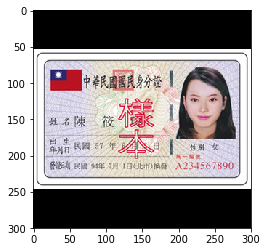

In [14]:
img = plt.imread(f'{PATH}valid/identity/{files[0]}')
plt.imshow(img);

img.shape représente la taille de la matrice en 3 dimensions de l'image :
- hauteur
- largeur
- nombre de canaux (3 couleurs)

In [15]:
img.shape

(300, 300, 3)

Affichons 5x5 pixels vers le centre de l'image
0 = NOIR

In [16]:
img[150:155,150:155,:]

array([[[218, 100, 112],
        [212, 202, 166],
        [207, 188, 155],
        [212, 197, 164],
        [214, 178, 154]],

       [[227,  98, 120],
        [211, 219, 180],
        [208, 146, 133],
        [218, 129, 125],
        [223, 177, 161]],

       [[225,  89, 113],
        [218, 234, 197],
        [218, 154, 142],
        [221,  21,  60],
        [226, 158, 155]],

       [[216,  89, 106],
        [218, 226, 189],
        [216, 163, 149],
        [218,  11,  55],
        [215,  20,  62]],

       [[214,  83,  99],
        [208, 219, 177],
        [216, 148, 135],
        [220,  24,  64],
        [221,  15,  61]]], dtype=uint8)

## entrainons notre premier modele simple

We're going to use a pre-trained model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the resnet34 model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on resnet models. We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a dogs vs cats model in 3 lines of code, and under 20 seconds:

In [17]:
arch=resnet34

### visualisons le modele resnet34

In [18]:
arch(True)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (b

In [19]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [20]:
learn.fit(0.01, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      0.787971   0.503829   0.811991  
    1      0.599664   0.427066   0.854906                  



[0.42706552, 0.8549055218696594]

##  analysons les résultats

In [21]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [22]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['anything', 'identity', 'inside']

In [23]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(619, 3)

In [24]:
log_preds[:10]

array([[-0.08741, -2.98815, -3.40165],
       [-0.07944, -2.69052, -4.76475],
       [-0.02932, -4.46105, -4.05452],
       [-0.00036, -9.2127 , -8.24613],
       [-0.01824, -4.87383, -4.56298],
       [-3.75992, -3.13741, -0.06901],
       [-2.93121, -0.09095, -3.39306],
       [-0.01276, -8.01948, -4.39384],
       [-0.50139, -3.83484, -0.98697],
       [-0.00438, -7.90738, -5.52146]], dtype=float32)

In [25]:
preds = np.argmax(log_preds, axis=1) 
probs = np.exp(log_preds[:,1])     

In [26]:
preds

array([0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 

### visualisons les images

In [27]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [28]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    title_preds = [preds[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_preds)

In [29]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [30]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    title_preds = [preds[x] for x in idxs]
    print(title)
    #return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))
    return plots(imgs, rows=1, titles=title_preds, figsize=(16,8))

Classification correcte : 0=anything, 1=identity, 2=inside


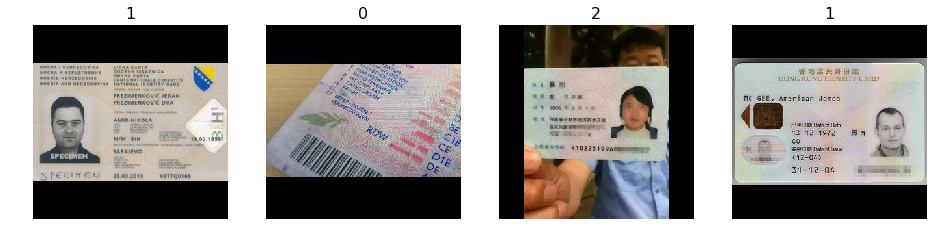

In [31]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Classification correcte : 0=anything, 1=identity, 2=inside")

Classification erronée


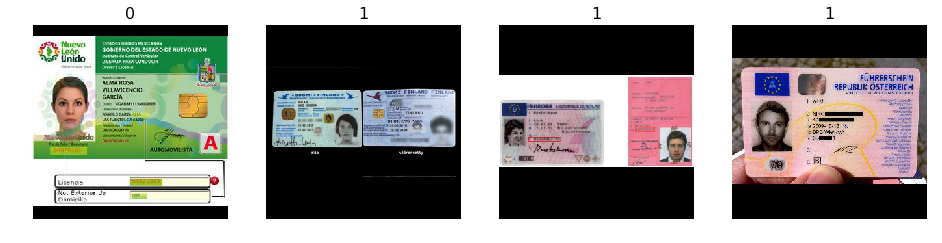

In [32]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Classification erronée")

In [33]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

### meilleures prédictions

Meilleures prédicitions d'images anything


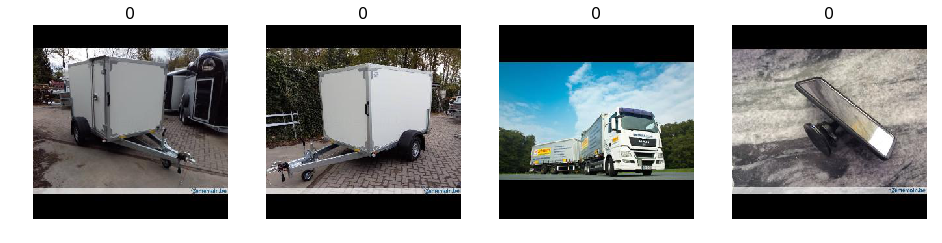

In [34]:
plot_val_with_title(most_by_correct(0, True), "Meilleures prédicitions d'images anything")

Meilleures prédicitions d'images identity


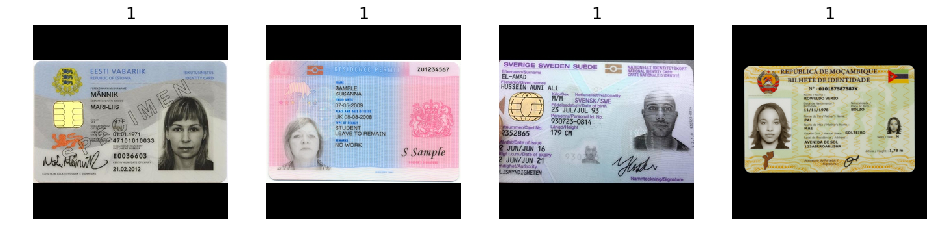

In [35]:
plot_val_with_title(most_by_correct(1, True),  "Meilleures prédicitions d'images identity")

Meilleures prédicitions d'images inside


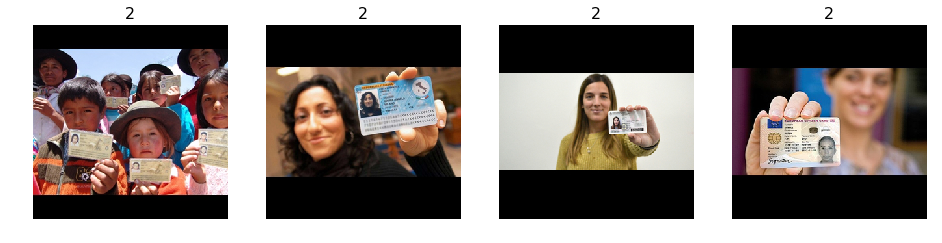

In [36]:
plot_val_with_title(most_by_correct(2, True), "Meilleures prédicitions d'images inside")

### pires prédictions
à 84% d'accuracy, l'algorithme met déjà en évidence des erreurs humaines de classement

Pires prédictions d'images anything


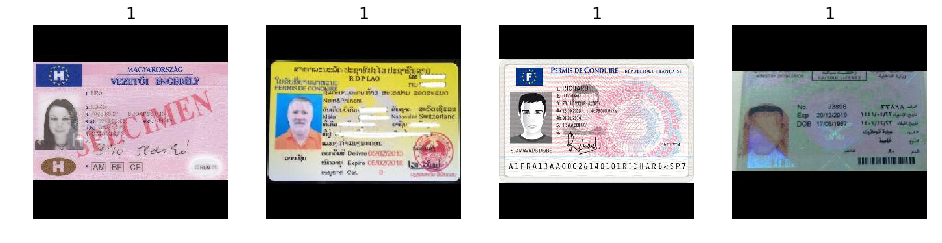

In [37]:
plot_val_with_title(most_by_correct(0, False), "Pires prédictions d'images anything")

Pires prédictions d'images Identity


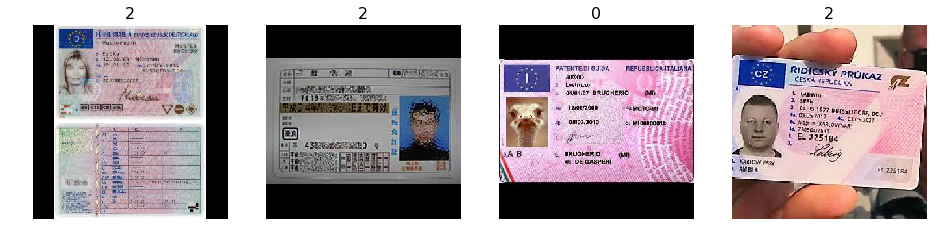

In [38]:
plot_val_with_title(most_by_correct(1, False), "Pires prédictions d'images Identity")

Pires prédictions d'images Inside


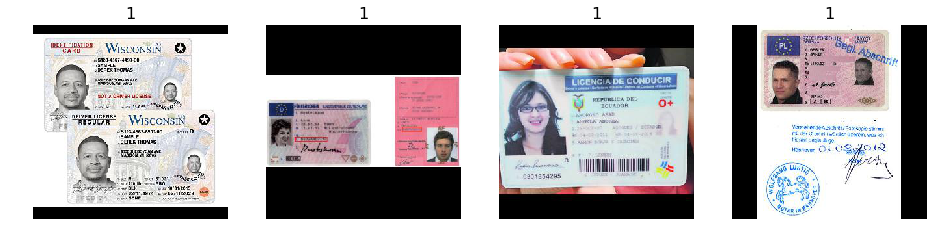

In [39]:
plot_val_with_title(most_by_correct(2, False), "Pires prédictions d'images Inside")

Predictions les plus incertaines


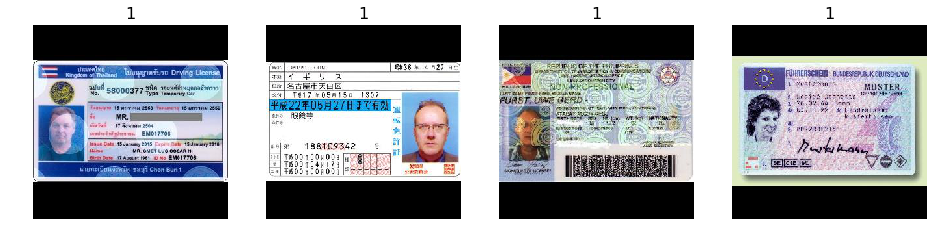

In [40]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Predictions les plus incertaines")

### évaluer l'entrainement : matrice de confusion

There is something else we can do with data augmentation: use it at inference time (also known as test time). Not surprisingly, this is known as test time augmentation, or just TTA.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's TTA() method.


In [41]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [42]:
accuracy_np(probs, y)

0.8594507269789984

In [43]:
from sklearn.metrics import confusion_matrix

[[210  25  16]
 [  2 243   4]
 [ 20  20  79]]


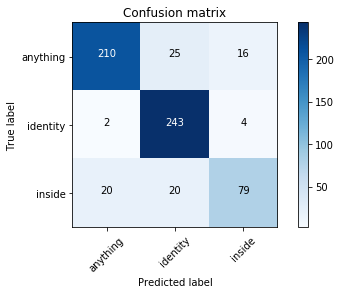

In [44]:
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [45]:
learn.save('masterclass-iteration01')

## améliorer la précisions des predictions

### plus d'entrainement

In [46]:
learn.fit(0.01, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.439395   0.420544   0.850218  
    1      0.393845   0.41264    0.855669                  



[0.41264042, 0.8556686043739319]

In [47]:
learn.fit(0.01, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.371373   0.406266   0.854142  
    1      0.355075   0.404775   0.865044                  



[0.40477547, 0.8650436043739319]

In [48]:
learn.fit(0.01, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.327228   0.412038   0.854869  
    1      0.30747    0.407554   0.857994                  



[0.40755448, 0.8579941868782044]

In [49]:
learn.save('masterclass-iteration02')

### entrainer plus de couches

In [50]:
learn.unfreeze()

In [51]:
lr2=np.array([1e-3,1e-2,1e-1])

In [52]:
learn.fit(lr2, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.388055   0.465734   0.851054  
    1      0.517533   0.720608   0.831504                  
    2      0.468443   0.636667   0.846294                  
    3      0.465907   0.857972   0.809702                  
    4      0.473819   0.663813   0.849382                  
    5      0.407972   0.639661   0.844767                  
    6      0.348209   0.613883   0.848619                  



[0.6138826, 0.8486191868782044]

In [61]:
learn.save('masterclass-iteration03')

### Data Augmentation

If you try training for more epochs, you'll notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side (e.g. most photos of dogs and cats, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [89]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [90]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [91]:
ims = np.stack([get_augs() for i in range(6)])

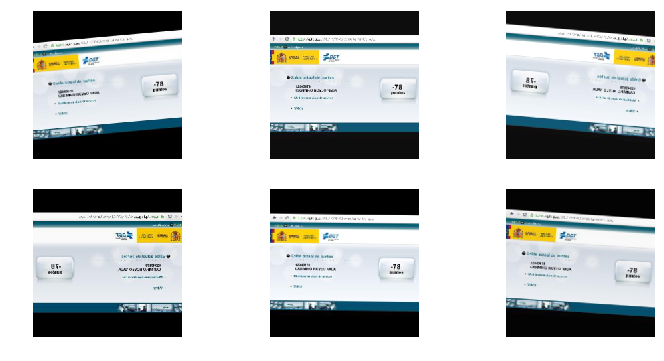

In [92]:
plots(ims, rows=2)

Let's create a new data object that includes this augmentation in the transforms.

In [95]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn2 = ConvLearner.pretrained(arch, data, precompute=True)

In [96]:
learn2.fit(0.01, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      0.807936   0.494412   0.815952  
    1      0.601322   0.420319   0.839317                 



[0.42031893, 0.839316862821579]

In [97]:
learn2.precompute=False

By default when we create a learner, it sets all but the last layer to frozen. That means that it's still only updating the weights in the last layer when we call fit.

In [98]:
learn2.fit(1e-1, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.590239   0.470262   0.830705  
    1      0.622082   0.577558   0.821366                  
    2      0.656704   0.545991   0.829142                  



[0.5459906, 0.829142439365387]

What is that `cycle_len` parameter? What we've done here is used a technique called *stochastic gradient descent with restarts (SGDR)*, a variant of *learning rate annealing*, which gradually decreases the learning rate as training progresses. This is helpful because as we get closer to the optimal weights, we want to take smaller steps.

However, we may find ourselves in a part of the weight space that isn't very resilient - that is, small changes to the weights may result in big changes to the loss. We want to encourage our model to find parts of the weight space that are both accurate and stable. Therefore, from time to time we increase the learning rate (this is the 'restarts' in 'SGDR'), which will force the model to jump to a different part of the weight space if the current area is "spikey". Here's a picture of how that might look if we reset the learning rates 3 times (in this paper they call it a "cyclic LR schedule"):

<img src="../fastai/courses/dl1/images/sgdr.png" width="80%">
(From the paper [Snapshot Ensembles](https://arxiv.org/abs/1704.00109)).

The number of epochs between resetting the learning rate is set by `cycle_len`, and the number of times this happens is refered to as the *number of cycles*, and is what we're actually passing as the 2nd parameter to `fit()`. So here's what our actual learning rates looked like:

In [99]:
learn2.fit(1e-1, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.573207   0.556819   0.835465  
    1      0.542551   0.502817   0.851017                  
    2      0.538407   0.539679   0.825291                  



[0.5396787, 0.8252906978130341]

In [100]:
learn2.fit(1e-1, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.467434   0.490494   0.844731  
    1      0.493724   0.490861   0.833866                  
    2      0.465526   0.477688   0.852544                  



[0.477688, 0.8525436043739318]

In [101]:
learn2.fit(1e-1, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.378089   0.483041   0.852616  
    1      0.384011   0.599361   0.829942                  
    2      0.407954   0.563961   0.831468                  



[0.56396097, 0.8314680218696594]

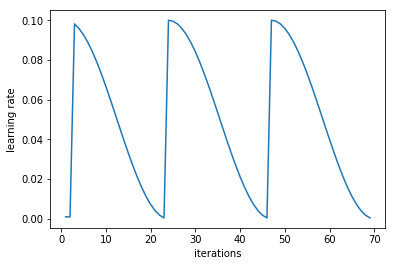

In [102]:
learn2.sched.plot_lr()

In [106]:
learn2.unfreeze()

In [107]:
lr=np.array([1e-4,1e-3,1e-2])

In [108]:
learn2.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.654885   0.599822   0.843169  
    1      0.496688   0.497777   0.869622                  
    2      0.41547    0.462137   0.861119                  
    3      0.346147   0.442518   0.863445                  
    4      0.287495   0.420181   0.870458                  
    5      0.245619   0.414211   0.861882                  
    6      0.215129   0.415012   0.870458                  



[0.41501182, 0.8704578459262848]

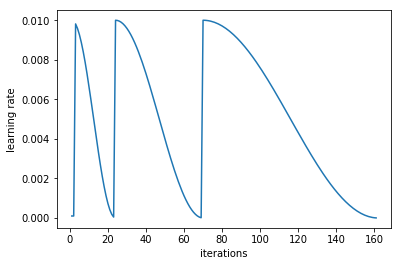

In [109]:
learn2.sched.plot_lr()

In [118]:
learn2.save('masterclass-iteration04')

In [131]:
log_preds,y = learn2.TTA()
probs = np.mean(np.exp(log_preds),0)

In [132]:
accuracy_np(probs, y)

0.8852988691437803

In [133]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [134]:
preds = np.argmax(probs, axis=1)
probs=probs[:,1]

In [135]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [136]:
cm = confusion_matrix(y, preds)

[[214  20  17]
 [  8 237   4]
 [ 12  10  97]]


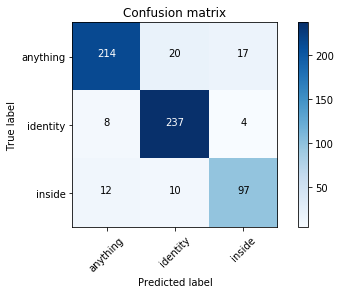

In [137]:
plot_confusion_matrix(cm, data.classes)

### regardons les predictions une nouvelle fois

Pires prédictions d'images anything


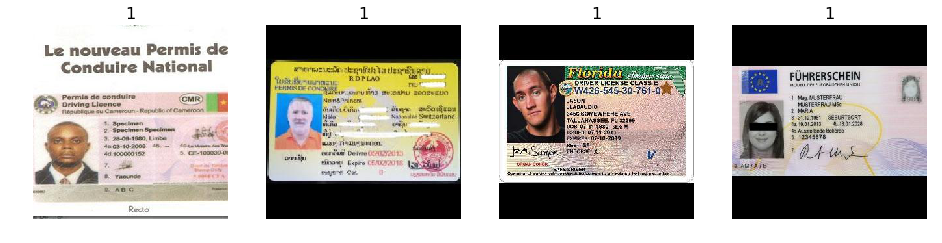

In [138]:
plot_val_with_title(most_by_correct(0, False), "Pires prédictions d'images anything")

Pires prédictions d'images Identity


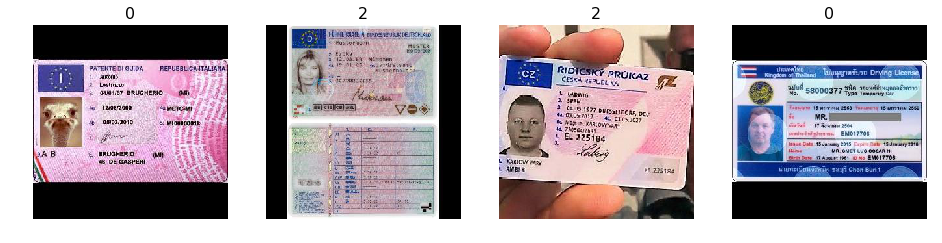

In [139]:
plot_val_with_title(most_by_correct(1, False), "Pires prédictions d'images Identity")

Pires prédictions d'images Inside


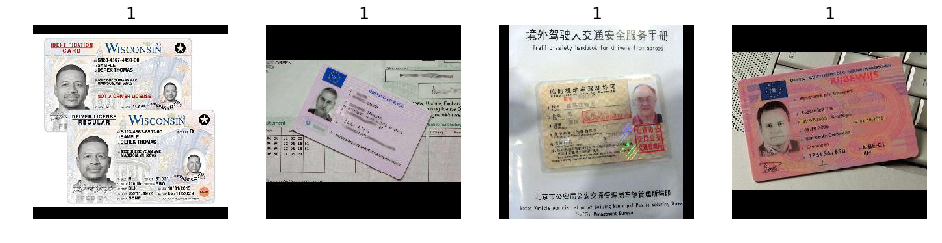

In [140]:
plot_val_with_title(most_by_correct(2, False), "Pires prédictions d'images Inside")

## Review: easy steps to train a world-class image classifier

1. Enable data augmentation, and precompute=True
1. Use lr_find() to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use lr_find() again
1. Train full network with cycle_mult=2 until over-fitting

